In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import HTML, display
import google.colab.output

In [2]:
# Data Collection
movies = pd.read_csv("/content/drive/MyDrive/movies.csv")
ratings = pd.read_csv("/content/drive/MyDrive/ratings.csv")

In [3]:
# Data Exploration
print("Movies dataset:\n")
movies

Movies dataset:



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [4]:
print("Shape:", movies.shape)
movies.info()

Shape: (62423, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [5]:
print("Ratings dataset:\n")
ratings

Ratings dataset:



,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [6]:
print("Shape:", ratings.shape)
ratings.info()

Shape: (25000095, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [7]:
print("Descriptive statistics for movies dataset:")
print(movies.describe())

print("\nDescriptive statistics for ratings dataset:")
print(ratings.describe())

Descriptive statistics for movies dataset:
             movieId
count   62423.000000
mean   122220.387646
std     63264.744844
min         1.000000
25%     82146.500000
50%    138022.000000
75%    173222.000000
max    209171.000000

Descriptive statistics for ratings dataset:
             userId       movieId        rating     timestamp
count  2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00  1.215601e+09
std    4.679172e+04  3.919886e+04  1.060744e+00  2.268758e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.196000e+03  3.000000e+00  1.011747e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.198868e+09
75%    1.215570e+05  8.623000e+03  4.000000e+00  1.447205e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


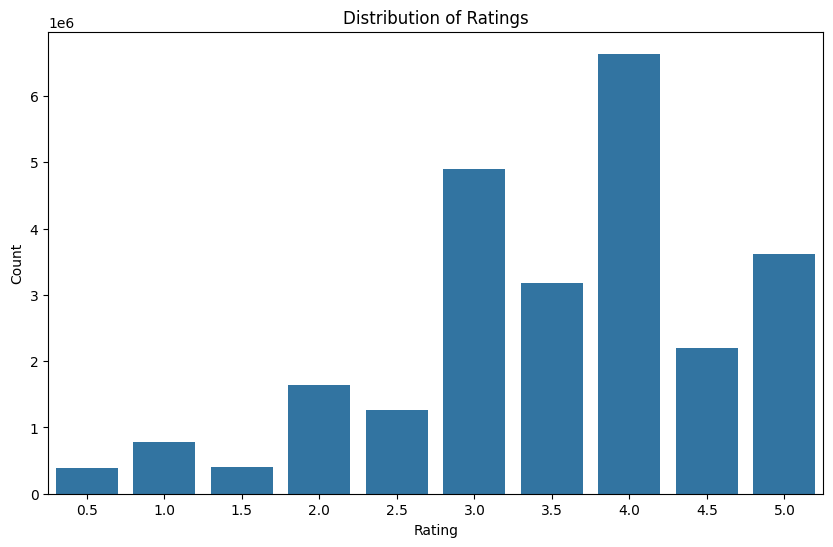

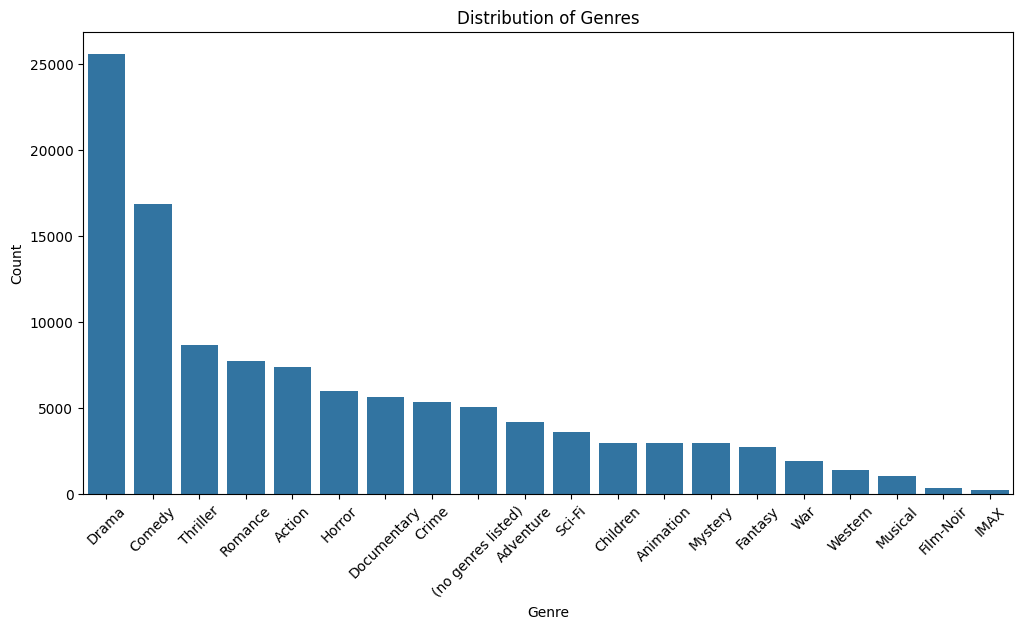

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

genres = movies['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genres.index, y=genres.values)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
print("Missing values in movies dataset:\n")
movies.isnull().sum()

Missing values in movies dataset:



movieId    0
title      0
genres     0
dtype: int64

In [10]:
print("Missing values in ratings dataset:\n")
ratings.isnull().sum()

Missing values in ratings dataset:



userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [11]:
# Data Preprocessing
def clean(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

movies["clean"] = movies["title"].apply(clean)

vectorizer = TfidfVectorizer(ngram_range=(1,2))
feature_vectors = vectorizer.fit_transform(movies["clean"])

In [12]:
movies

,movieId,title,genres,clean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
62418,209157,We (2018),Drama,We 2018
62419,209159,Window of the Soul (2001),Documentary,Window of the Soul 2001
62420,209163,Bad Poems (2018),Comedy|Drama,Bad Poems 2018
62421,209169,A Girl Thing (2001),(no genres listed),A Girl Thing 2001


In [13]:
print(feature_vectors)

  (0, 138180)	0.5609151642422612
  (0, 153617)	0.5236464902527855
  (0, 763)	0.2947573407787223
  (0, 138134)	0.30818287987354687
  (0, 153609)	0.4788631896261391
  (1, 76516)	0.679914841526996
  (1, 76515)	0.6556226145512709
  (1, 763)	0.3284429867728573
  (2, 93339)	0.4587178998289233
  (2, 107075)	0.4026827592738571
  (2, 61532)	0.4587178998289233
  (2, 93306)	0.2658829644982531
  (2, 107020)	0.2945915056134832
  (2, 61531)	0.4587178998289233
  (2, 763)	0.22159051090518359
  (3, 47815)	0.4482553482876628
  (3, 151964)	0.4482553482876628
  (3, 161363)	0.4482553482876628
  (3, 47814)	0.4482553482876628
  (3, 151795)	0.1883000782500215
  (3, 161345)	0.33752574781287953
  (3, 763)	0.21653641961669368
  (4, 70008)	0.39452077294643884
  (4, 111066)	0.3080717668800027
  (4, 20729)	0.4091386155137103
  :	:
  (62419, 135163)	0.335141385640017
  (62419, 842)	0.21664294220561653
  (62419, 165119)	0.3842738783112516
  (62419, 106460)	0.1903879435867097
  (62419, 143735)	0.09431759289399541
  (6

In [14]:
# Collaborative Filtering
def search(title):
    title = clean(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, feature_vectors).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies.iloc[indices][::-1]
    return results

def find_similar_movies(movie_id):
    similar_users = ratings[(ratings["movieId"] == movie_id) & (ratings["rating"] > 4)]["userId"].unique()
    similar_user_recs = ratings[(ratings["userId"].isin(similar_users)) & (ratings["rating"] > 4)]["movieId"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings[(ratings["movieId"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movieId"].value_counts() / len(all_users["userId"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]

    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    return rec_percentages.head(10).merge(movies, left_index=True, right_on = "movieId")[["score", "title", "genres"]]

In [15]:
# Movie Recommendations
def get_recommendations(title):
    results = search(title)
    movie_id = results.iloc[0]["movieId"]
    recommended_movies = find_similar_movies(movie_id)
    display(HTML("<h2>Recommended Movies</h2>"))
    display(recommended_movies)

google.colab.output.register_callback('notebook.get_recommendations', get_recommendations)

In [16]:
# Interactive Interface
html = """
<!DOCTYPE html>
<html>
<head>
  <title>Movie Recommendation System</title>
  <script>
    function getRecommendations() {
      var title = document.getElementById("movie_title").value;
      google.colab.kernel.invokeFunction('notebook.get_recommendations', [title], {});
    }

    function handleResponse(recommendedMovies) {
      var recommendationsDiv = document.getElementById("recommendations");
      recommendationsDiv.innerHTML = "<h2>Recommended Movies</h2>";

      recommendedMovies.forEach(function(movie) {
        var movieDiv = document.createElement("div");
        movieDiv.textContent = movie.title + " (" + movie.genres + ")";
        recommendationsDiv.appendChild(movieDiv);
      });
    }
  </script>
</head>
<body>
  <h1>Movie Recommendation System</h1>
  <label for="movie_title">Enter a Movie Title:</label>
  <input type="text" id="movie_title" required>
  <button onclick="getRecommendations()">Get Recommendations</button>
  <div id="recommendations"></div>
</body>
</html>
"""
display(HTML(html))

,score,title,genres
41769,200.064474,Moonlight,Drama
48904,72.682599,The Florida Project (2017),Drama
55938,69.773375,Roma (2018),Drama
43222,62.173883,Manchester by the Sea (2016),Drama
44566,60.646722,Call Me by Your Name (2017),Drama|Romance
51758,48.471678,The Favourite,Drama
48887,44.145682,Lady Bird (2017),Comedy
18487,42.355992,"Master, The (2012)",Drama
40153,41.454801,The Handmaiden (2016),Drama|Romance|Thriller
51773,40.287583,Hereditary (2018),(no genres listed)
